<a href="https://colab.research.google.com/github/qwebasilio/CPE019/blob/main/Hands_on_Activity_11_1_%7C_Prepare_a_Dataset_for_LSTM_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN
--- | ---
**Name**  |  Basilio, Wilhelm Elian
**Course & Section**  |  CPE 019-CPE32S4
**Date** | April 30, 2024

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df = df[['Date', 'Close']]
df.set_index('Date', inplace=True)

df = df.dropna()

In [8]:
train = df[df.index < '2017-01-01']
test = df[df.index >= '2017-01-01']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)

In [9]:
X_train = []
y_train = []

for i in range(60, len(scaled_train)):
    X_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

---

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


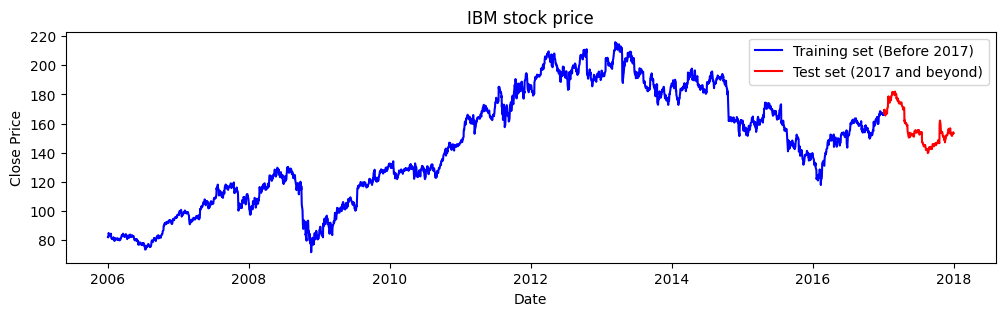

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

total_data = pd.concat((train, test), axis=0)
inputs = total_data[len(total_data) - len(test) - 60:].values
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(12,3))
plt.plot(train.index, train['Close'], color='blue', label='Training set (Before 2017)')
plt.plot(test.index, test['Close'], color='red', label='Test set (2017 and beyond)')
plt.title('IBM stock price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()